In [160]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [161]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mosapabdelghany/medical-insurance-cost-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\HP\.cache\kagglehub\datasets\mosapabdelghany\medical-insurance-cost-dataset\versions\1


In [162]:
df = pd.read_csv('../datasets/insurance.csv')

In [163]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [165]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

В данных нет пропусков

In [166]:
df_original = df.copy()

In [167]:
df = df.drop_duplicates()

Проверка некорретных значений

In [168]:
def validate_data(df):
    errors = []

    if 'age' in df.columns:
        invalid_age = df[(df['age'] < 0) | df['age'] > 120]
        if len(invalid_age) > 0:
            errors.append(f"Некорректный возраст: {len(invalid_age)} строк")

    if 'sex' in df.columns:
        valid_sex = df[(df['sex'] == 'male')|(df['sex'] == 'female')] 
        if (len(df['sex']) - len(valid_sex)) > 0:
            errors.append(f"Некорректный пол: {len(len(df['sex']) - len(valid_sex))} строк")
    return errors

In [169]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [170]:
errors = validate_data(df)
for err in errors:
    print(err)

Гистограммы

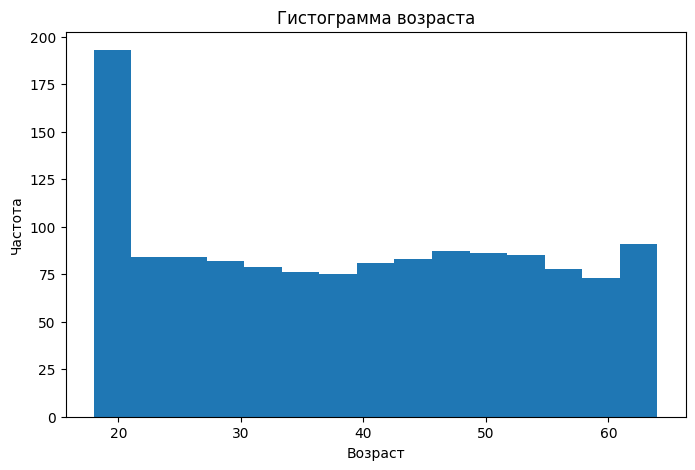

In [171]:
plt.figure(figsize=(8,5))
plt.hist(df['age'], bins=15)
plt.title('Гистограмма возраста')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.show()

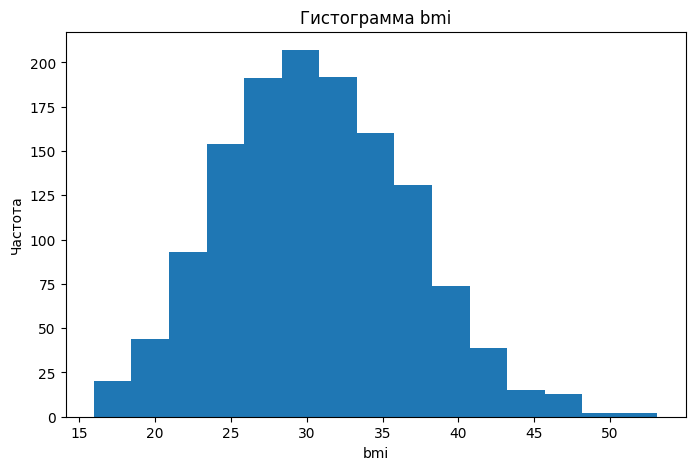

In [172]:
plt.figure(figsize=(8,5))
plt.hist(df['bmi'], bins=15)
plt.title('Гистограмма bmi')
plt.xlabel('bmi')
plt.ylabel('Частота')
plt.show()

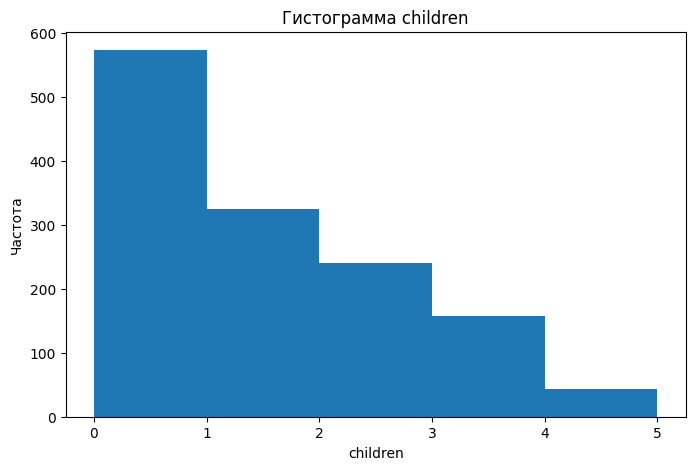

In [173]:
plt.figure(figsize=(8,5))
plt.hist(df['children'], bins=5)
plt.title('Гистограмма children')
plt.xlabel('children')
plt.ylabel('Частота')
plt.show()

In [174]:
female_count = sum(df['sex'] == 'female')
male_count = len(df['sex']) - female_count
print("Количество женщин: ", female_count)
print("Количество мужчин: ", male_count)

Количество женщин:  662
Количество мужчин:  675


In [175]:
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'],drop_first=True)
df = df.astype({col: 'int' for col in df.select_dtypes('bool').columns})

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1337 non-null   int64  
 1   bmi               1337 non-null   float64
 2   children          1337 non-null   int64  
 3   charges           1337 non-null   float64
 4   sex_male          1337 non-null   int64  
 5   smoker_yes        1337 non-null   int64  
 6   region_northwest  1337 non-null   int64  
 7   region_southeast  1337 non-null   int64  
 8   region_southwest  1337 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 104.5 KB


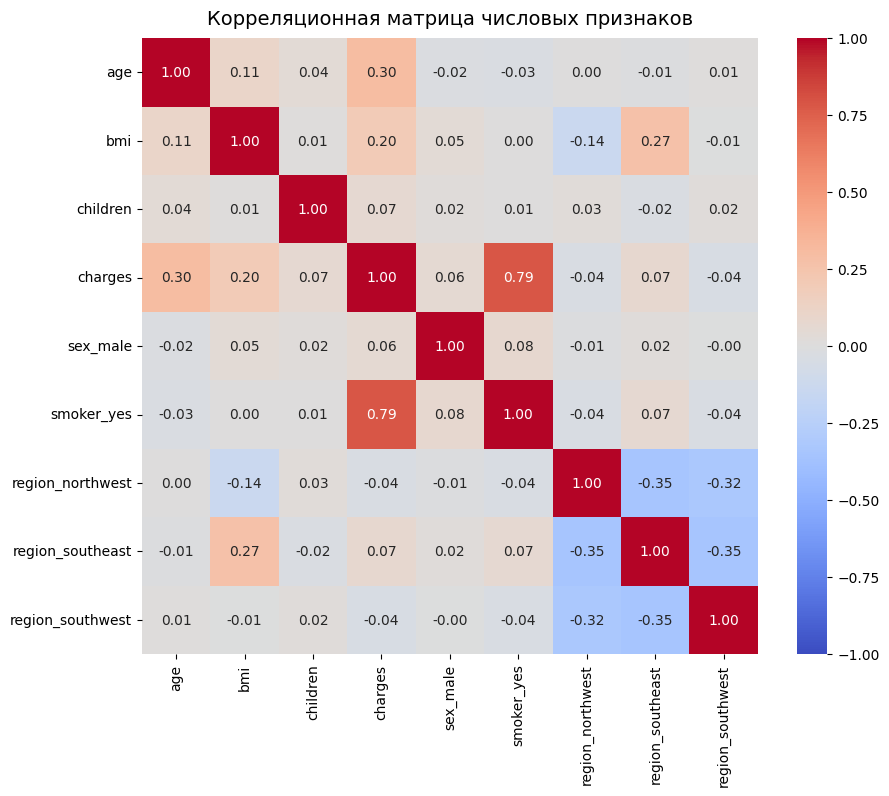

In [177]:
plt.figure(figsize=(10,8))
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
corr_matrix= df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', center=0, fmt='.2f', square=True, vmin=-1, vmax=1)
plt.title('Корреляционная матрица числовых признаков', fontsize=14, pad=10)
plt.show()

In [178]:
columns_to_drop = ['region_southwest','region_southeast', 'region_northwest', 'sex_male', 'children']

In [179]:
df = df.drop(columns = columns_to_drop)

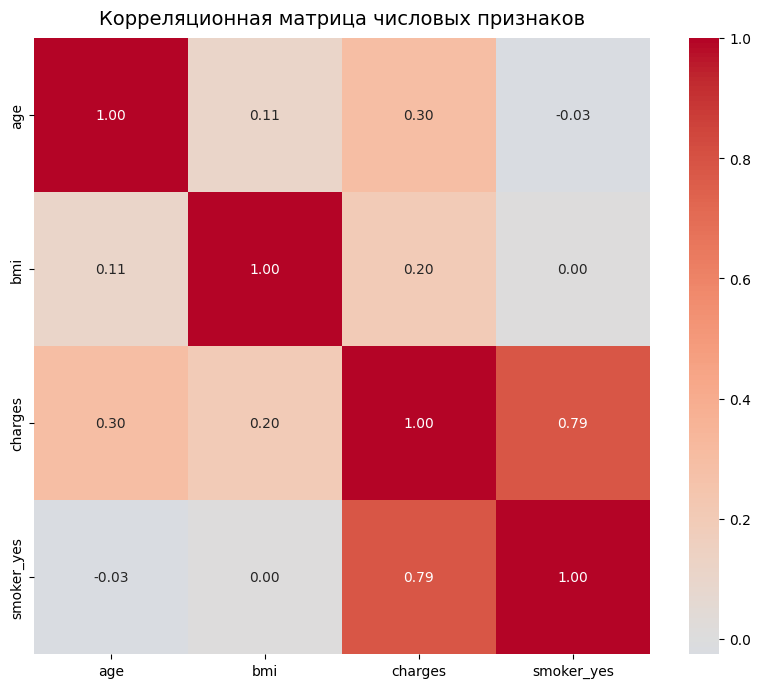

In [180]:
plt.figure(figsize=(10,8))
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
corr_matrix= df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', center=0, fmt='.2f', square=True)
plt.title('Корреляционная матрица числовых признаков', fontsize=14, pad=10)
plt.show()

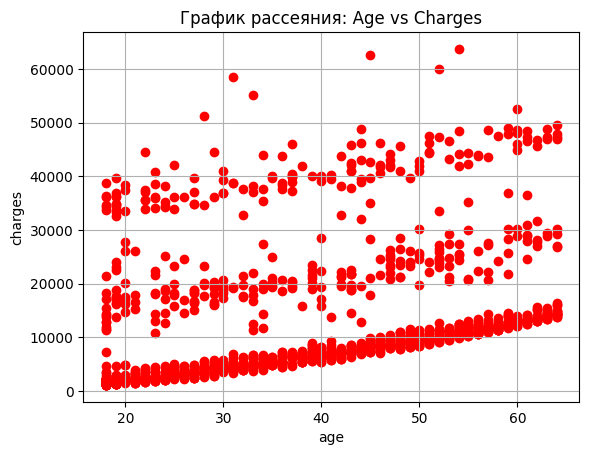

In [181]:
plt.scatter(df['age'], df['charges'], color = 'red')
plt.title('График рассеяния: Age vs Charges')
plt.xlabel('age')
plt.ylabel('charges')
plt.grid(True)
plt.show()

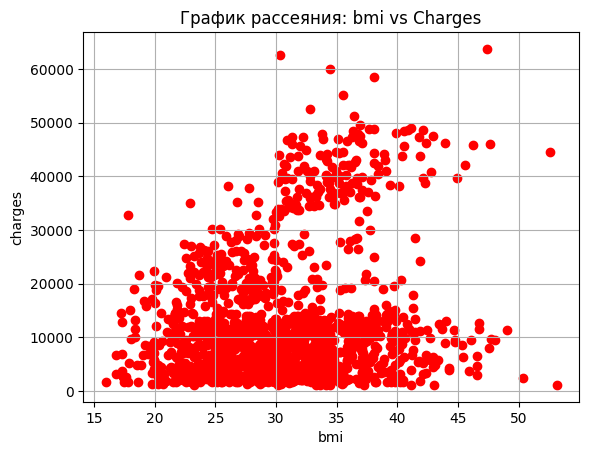

In [182]:
plt.scatter(df['bmi'], df['charges'], color = 'red')
plt.title('График рассеяния: bmi vs Charges')
plt.xlabel('bmi')
plt.ylabel('charges')
plt.grid(True)
plt.show()

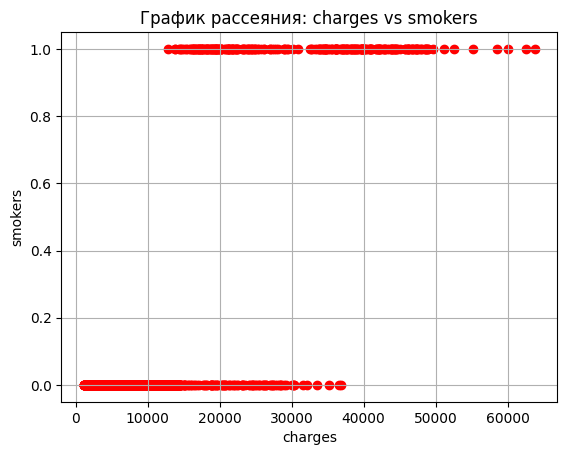

In [183]:
plt.scatter(df['charges'], df['smoker_yes'], color = 'red')
plt.title('График рассеяния: charges vs smokers')
plt.xlabel('charges')
plt.ylabel('smokers')
plt.grid(True)
plt.show()

Построение линейной регрессии

In [184]:
import numpy as np
import matplotlib.pyplot as plt

class LinearRegressionAnalytic:
    def fit(self, X, y):
        X = np.array(X, dtype=np.float64)
        y = np.array(y, dtype=np.float64).reshape(-1, 1)
        X_with_intercept = np.hstack([np.ones((X.shape[0], 1)), X])
        self.coef_ = np.linalg.inv(X_with_intercept.T @ X_with_intercept) @ X_with_intercept.T @ y
        self.intercept_ = self.coef_[0, 0]
        self.coef_ = self.coef_[1:].ravel()
    
    def predict(self, X):
        X = np.array(X, dtype=np.float64)
        return (self.intercept_ + X @ self.coef_).ravel()

learning_rate - шаг обучения, n_iters - количество итераций

Градиент по $\beta_0$:
$$\frac{\partial J}{\partial \beta_0} = \frac{1}{m} \sum_{i=1}^m (\hat{y}_i - y_i)$$

Градиент по $\beta_j$ (для всех признаков):
$$\frac{\partial J}{\partial \beta_j} = \frac{1}{m} \sum_{i=1}^m (\hat{y}_i - y_i) \cdot x_{ij}$$

In [185]:
import numpy as np
import matplotlib.pyplot as plt

class LinearRegressionGD:
    def __init__(self, learning_rate=0.01, n_iters=2000, tol=1e-6):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.tol = tol
        self.coef_ = None
        self.intercept_ = None
        self.cost_history = []

    def fit(self, X, y):
        X = np.array(X, dtype=np.float64)
        y = np.array(y, dtype=np.float64).reshape(-1, 1)
        
        n_samples, n_features = X.shape
        
        self.coef_ = np.zeros(n_features)
        self.intercept_ = 0.0

        for i in range(self.n_iters):
            y_pred = self.intercept_ + X @ self.coef_
            y_pred = y_pred.reshape(-1, 1)
            
            error = y_pred - y
            
            # MSE loss
            cost = np.mean(error ** 2)
            self.cost_history.append(cost)
            
            # Ранняя остановка
            if i > 100 and abs(self.cost_history[-2] - cost) < self.tol:
                print(f"Сходимость достигнута на итерации {i}")
                break
                
            # Градиенты 
            d_intercept = np.mean(error)
            d_coef = (X.T @ error) / n_samples
            d_coef = d_coef.ravel()
            
            # Обновление весов
            self.intercept_ -= self.lr * d_intercept
            self.coef_ -= self.lr * d_coef

    def predict(self, X):
        X = np.array(X, dtype=np.float64)
        return (self.intercept_ + X @ self.coef_).ravel()

In [186]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [187]:
y = df['charges']
X = df.drop('charges', axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

analytic_model = LinearRegressionAnalytic()
analytic_model.fit(X_train_scaled, y_train)  
y_pred_analytic = analytic_model.predict(X_test_scaled)

gd_model = LinearRegressionGD(learning_rate=0.05, n_iters=5000)
gd_model.fit(X_train_scaled, y_train)
y_pred_gd = gd_model.predict(X_test_scaled)

Сходимость достигнута на итерации 309


In [188]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

In [189]:
df.describe()

,age,bmi,charges,smoker_yes
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,13279.121487,0.204936
std,14.044333,6.100468,12110.359656,0.403806
min,18.000000,15.960000,1121.873900,0.000000
25%,27.000000,26.290000,4746.344000,0.000000
50%,39.000000,30.400000,9386.161300,0.000000
75%,51.000000,34.700000,16657.717450,0.000000
max,64.000000,53.130000,63770.428010,1.000000


In [190]:
print(f"R²              : {r2_score(y_test, y_pred_analytic):.4f}")          # чем ближе к 1, тем лучше
print(f"MAE             : {mean_absolute_error(y_test, y_pred_analytic):.2f}")   # средняя ошибка в долларах
print(f"RMSE            : {np.sqrt(mean_squared_error(y_test, y_pred_analytic)):.2f}")
print(f"MAPE            : {mean_absolute_percentage_error(y_test, y_pred_analytic):.2%}")  # относительная ошибка

R²              : 0.8050
MAE             : 4191.70
RMSE            : 5986.78
MAPE            : 43.72%


Для градиентного спуска

In [191]:
print(f"R²              : {r2_score(y_test, y_pred_gd):.4f}")          # чем ближе к 1, тем лучше
print(f"MAE             : {mean_absolute_error(y_test, y_pred_gd):.2f}")   # средняя ошибка в долларах
print(f"RMSE            : {np.sqrt(mean_squared_error(y_test, y_pred_gd)):.2f}")
print(f"MAPE            : {mean_absolute_percentage_error(y_test, y_pred_gd):.2%}")  # относительная ошибка

R²              : 0.8050
MAE             : 4191.70
RMSE            : 5986.78
MAPE            : 43.72%


In [192]:
class RidgeRegressionAnalytic:
    def __init__(self, alpha=1.0):
        self.alpha = alpha          # это λ — сила регуляризации
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X, y):
        X = np.array(X, dtype=np.float64)
        y = np.array(y, dtype=np.float64).reshape(-1, 1)
        
        n_samples, n_features = X.shape
        
        # Добавляем столбец единиц для intercept
        X_with_intercept = np.hstack([np.ones((n_samples, 1)), X])
        
        # Ridge: (X^T X + λ I)^(-1) X^T y
        # Но λ добавляем ТОЛЬКО к весам признаков, НЕ к intercept!
        I = np.eye(n_features + 1)
        I[0, 0] = 0  # не штрафуем intercept
        
        weights = np.linalg.inv(X_with_intercept.T @ X_with_intercept + self.alpha * I) \
                  @ X_with_intercept.T @ y
        
        self.intercept_ = weights[0, 0]
        self.coef_ = weights[1:].ravel()

    def predict(self, X):
        X = np.array(X, dtype=np.float64)
        return (self.intercept_ + X @ self.coef_).ravel()

w = (X^T X + λ I)^(-1) X^T y      l2 регуляризация 

∂/∂wⱼ (MSE + λ/2 Σ w²) = (1/n) Xⱼ^T (Xw - y) + λ wⱼ

In [199]:
class RidgeRegressionGD:
    def __init__(self, learning_rate=0.05, n_iters=5000, alpha=1.0, tol=1e-6):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.alpha = alpha      # ← сила L2-регуляризации
        self.tol = tol
        self.coef_ = None
        self.intercept_ = None
        self.cost_history = []

    def fit(self, X, y):
        X = np.array(X, dtype=np.float64)
        y = np.array(y, dtype=np.float64).reshape(-1, 1)
        n_samples, n_features = X.shape
    
        self.coef_ = np.zeros(n_features)
        self.intercept_ = 0.0

        for i in range(self.n_iters):
            y_pred = self.intercept_ + X @ self.coef_
            y_pred = y_pred.reshape(-1, 1)
            error = y_pred - y

            # MSE + L2 penalty
            mse = np.mean(error ** 2)
            l2_penalty = 0.5 * self.alpha * np.sum(self.coef_ ** 2) / n_samples
            cost = mse + l2_penalty
            self.cost_history.append(cost)

            if i > 100 and abs(self.cost_history[-2] - cost) < self.tol:
                print(f"Ridge GD сошёлся на итерации {i}")
                break

            # Градиенты — ВОТ ТУТ ИСПРАВЛЕНИЕ!
            d_intercept = np.mean(error)
            d_coef = (X.T @ error).ravel() / n_samples + (self.alpha / n_samples) * self.coef_
            #                         ^^^^^^^ — .ravel() решает проблему навсегда!

            # Обновление
            self.intercept_ -= self.lr * d_intercept
            self.coef_ -= self.lr * d_coef

    def predict(self, X):
        X = np.array(X, dtype=np.float64)
        return (self.intercept_ + X @ self.coef_).ravel()

In [201]:
alphas = [0.0, 0.1, 1.0, 10.0, 100.0]

for alpha in alphas:
    # Аналитическое
    model_anal2 = RidgeRegressionAnalytic(alpha=alpha)
    model_anal2.fit(X_train_scaled, y_train)
    y_pred_a2 = model_anal2.predict(X_test_scaled)
    
    # GD
    model_gd2 = RidgeRegressionGD(learning_rate=0.05, n_iters=10000, alpha=alpha)
    model_gd2.fit(X_train_scaled, y_train)
    y_pred_g2 = model_gd2.predict(X_test_scaled)

Ridge GD сошёлся на итерации 309
Ridge GD сошёлся на итерации 402
Ridge GD сошёлся на итерации 449
Ridge GD сошёлся на итерации 492
Ridge GD сошёлся на итерации 493


In [ ]:
print(f"R²              : {r2_score(y_test, y_pred_a2):.4f}")        
print(f"MAE             : {mean_absolute_error(y_test, y_pred_a2):.2f}")   
print(f"RMSE            : {np.sqrt(mean_squared_error(y_test, y_pred_a2)):.2f}")
print(f"MAPE            : {mean_absolute_percentage_error(y_test, y_pred_a2):.2%}")  

R²              : 0.7842
MAE             : 4441.51
RMSE            : 6297.58
MAPE            : 48.94%


In [ ]:
print(f"R²              : {r2_score(y_test, y_pred_g2):.4f}")         
print(f"MAE             : {mean_absolute_error(y_test, y_pred_g2):.2f}")  
print(f"RMSE            : {np.sqrt(mean_squared_error(y_test, y_pred_g2)):.2f}")
print(f"MAPE            : {mean_absolute_percentage_error(y_test, y_pred_g2):.2%}") 

R²              : 0.7842
MAE             : 4441.51
RMSE            : 6297.58
MAPE            : 48.94%


После регуляризации метрики на тестовых данных ухудшились (итс оукей), потому что без регуляризации модель переобучается 

In [204]:
y_const_pred = np.full_like(y_test, y_train.mean())

In [ ]:
print(f"R²              : {r2_score(y_test, y_const_pred):.4f}")          
print(f"MAE             : {mean_absolute_error(y_test, y_const_pred):.2f}")   
print(f"RMSE            : {np.sqrt(mean_squared_error(y_test, y_const_pred)):.2f}")
print(f"MAPE            : {mean_absolute_percentage_error(y_test, y_const_pred):.2%}")  

R²              : -0.0084
MAE             : 9861.80
RMSE            : 13612.43
MAPE            : 151.23%
